# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [29]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [30]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [31]:
# uncomment and run the following lines for Google Colab

"""
    Mounts the Google Drive to the Colab notebook.
    the 'drive.mount()' method from the 'google.colab' library
    to mount the Google Drive to the Colab notebook. Once mounted, we can access
    all Google Drive files and folders directly from the notebook.
"""
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [32]:
# Write your code here to read the data
df = pd.read_csv('foodhub_order.csv')

In [43]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24




```
# This is formatted as code
```

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [34]:
# Write your code here
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")


There are 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [42]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


* There are 5 numerical columns in the data and 4 object type columns.
* rating is read as object type column but it should be a numerical column.

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [41]:
# checking missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [44]:
# prompt: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

# Write your code here to get the statistical summary of the data
df.describe()

# Write your code here to get the minimum, average, and maximum time it takes for food to be prepared
print('Minimum time to prepare food:', df['food_preparation_time'].min())
print('Average time to prepare food:', df['food_preparation_time'].mean())
print('Maximum time to prepare food:', df['food_preparation_time'].max())


Minimum time to prepare food: 20
Average time to prepare food: 27.371970495258168
Maximum time to prepare food: 35


In [ ]:
# Write your code here

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [54]:

# function to calculate the number of orders that are not rated
def rating_func():
    not_rated = df[df['rating'] == 'Not given'].shape[0]
    print(not_rated)

# Call the function to calculate the number of not rated orders
rating_func()


736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:

# Explore numerical variables
sns.histplot(df['cost_of_the_order'], kde=True,legend="full")
plt.show()
# Observations: The distribution of cost_of_the_order is right-skewed, indicating that most orders are for relatively low-cost items.


sns.boxplot(df['food_preparation_time'])
plt.show()
# Observations: The distribution of food_preparation_time is skewed to the right, indicating that most orders are prepared quickly, but there are some outliers with very long preparation times.

sns.boxplot(df['delivery_time'])
plt.show()
# Observations: The distribution of delivery_time is roughly symmetric, indicating that delivery times are generally consistent.

# Explore categorical variables
sns.countplot(df['day_of_the_week'])
plt.show()
# Observations: There are more orders placed on weekends than weekdays.

sns.countplot(df['cuisine_type'])
plt.show()
# Observations: Chinese cuisine is the most popular, followed by Italian and American.

sns.countplot(df['rating'])
plt.show()
# Observations: Most orders are rated 4 or 5 stars.


In [104]:
# check unique cuisine type
df['cuisine_type'].nunique()


14

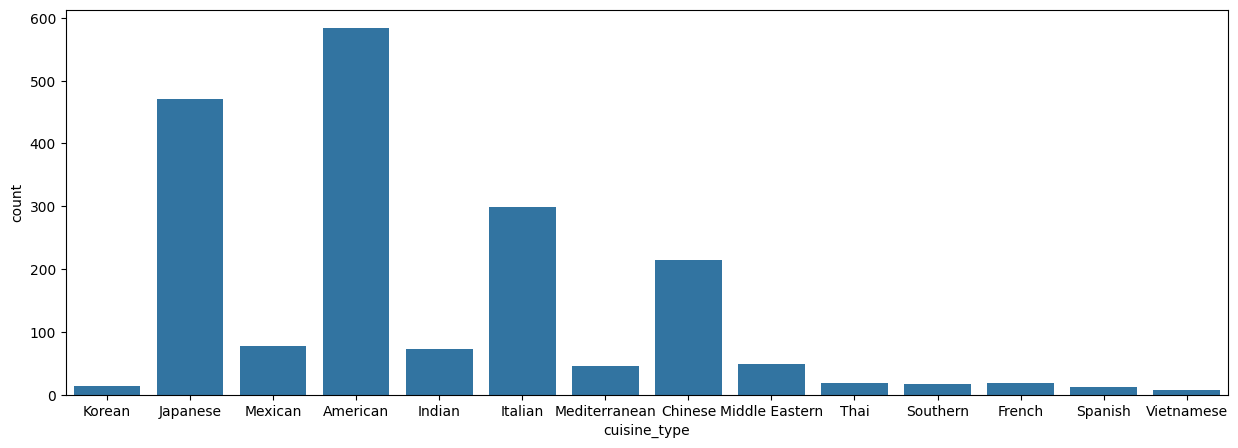

In [105]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');

<Axes: title={'center': 'Delivery Time Distribution'}, xlabel='Delivery Time', ylabel='Frequency'>

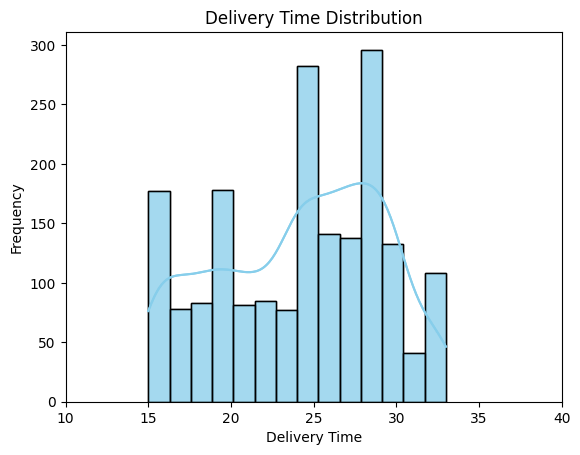

In [94]:
'''order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0'''

#sns.histplot(data=df, x="delivery_time", kde=True, hue="rating", multiple="dodge", shrink=.88)
sns.histplot(data=df, x="delivery_time", kde=True, color="skyblue")
plt.title('Delivery Time Distribution')
plt.xlim(10, 40)
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')

sns.histplot(data=df, x="delivery_time", kde=True, color="skyblue")



<Axes: xlabel='cuisine_type', ylabel='Count'>

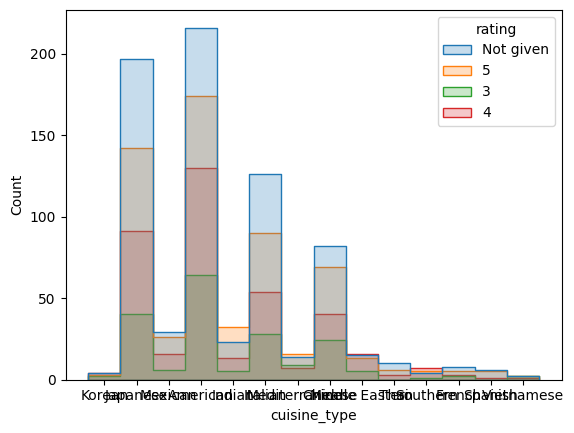

In [77]:
sns.histplot(df, x="cuisine_type", hue="rating", element="step")


C:\Users\gpadi40\AppData\Local\Temp\ipykernel_408700\688575398.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(data=df, x="cost_of_the_order", inner="box", scale="area")


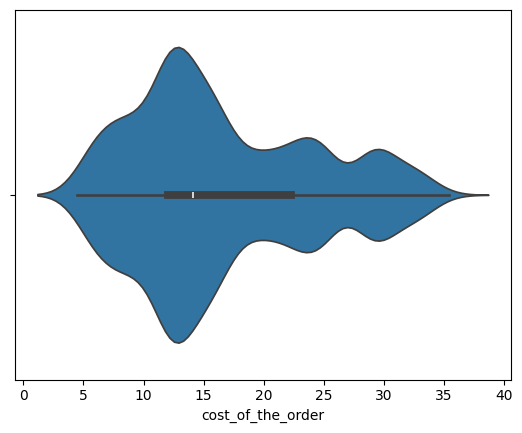

In [58]:

sns.violinplot(data=df, x="cost_of_the_order", inner="box", scale="area")
plt.show()



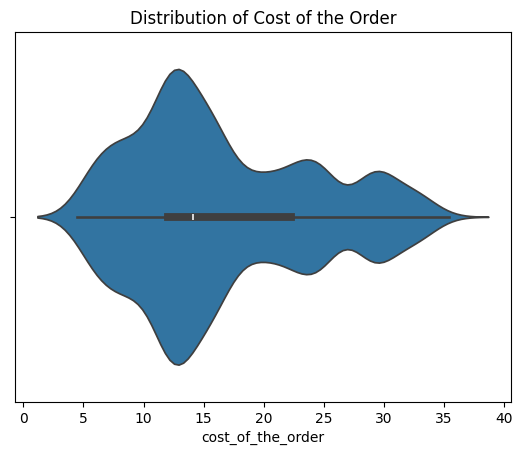

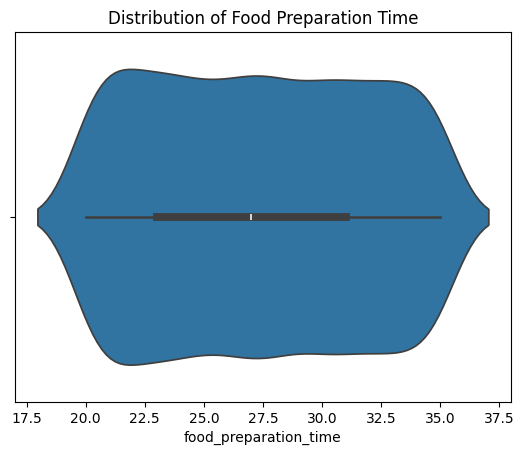

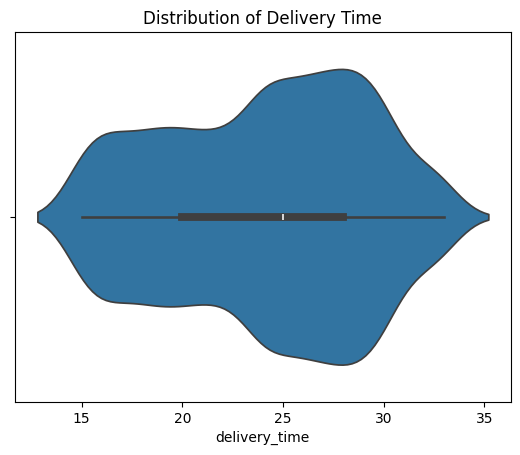

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot for cost_of_the_order
sns.violinplot(data=df, x="cost_of_the_order")
plt.title("Distribution of Cost of the Order")
plt.show()

# Create a violin plot for food_preparation_time
sns.violinplot(data=df, x="food_preparation_time")
plt.title("Distribution of Food Preparation Time")
plt.show()

# Create a violin plot for delivery_time
sns.violinplot(data=df, x="delivery_time")
plt.title("Distribution of Delivery Time")
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [95]:
# prompt: Which are the top 5 restaurants in terms of the number of orders received

df['restaurant_name'].value_counts().head(5)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [ ]:
# Write the code here

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [96]:
# prompt: Which is the most popular cuisine on weekends?

df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]['cuisine_type'].value_counts().head(1)


Series([], Name: count, dtype: int64)

In [ ]:
# Write the code here

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# prompt: What percentage of the orders cost more than 20 dollars?

costly_orders = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage = (costly_orders / total_orders) * 100
print(f"Percentage of orders costing more than 20 dollars: {percentage:.2f}%")


Percentage of orders costing more than 20 dollars: 29.24%


In [ ]:
# Write the code here

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [97]:
# prompt: What is the mean order delivery time?

mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")


Mean order delivery time: 24.16 minutes


In [ ]:
# Write the code here

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [98]:
# prompt: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

most_frequent_customers = df['customer_id'].value_counts().head(3)
for customer_id, order_count in most_frequent_customers.items():
    print(f"Customer ID: {customer_id}, Number of orders: {order_count}")


Customer ID: 52832, Number of orders: 13
Customer ID: 47440, Number of orders: 10
Customer ID: 83287, Number of orders: 9


In [ ]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


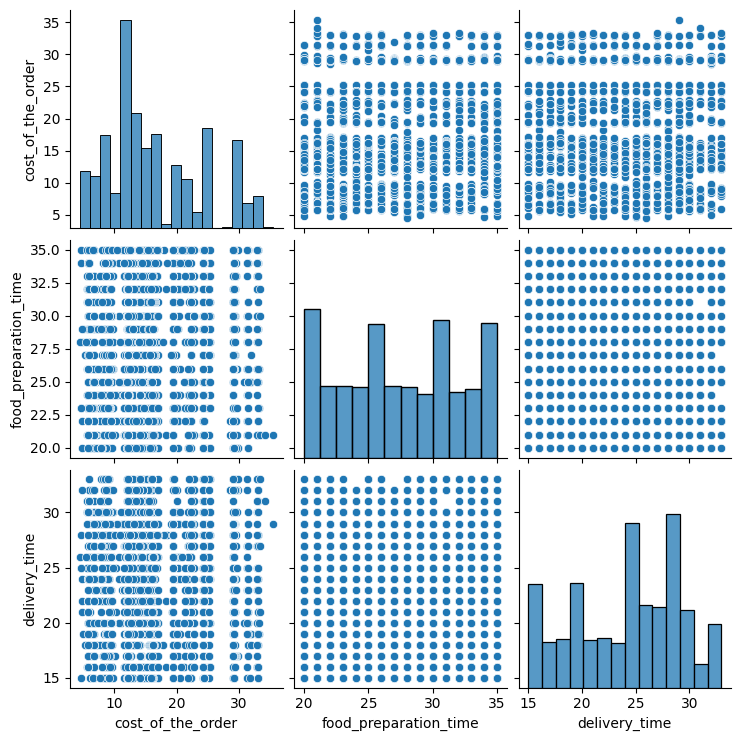

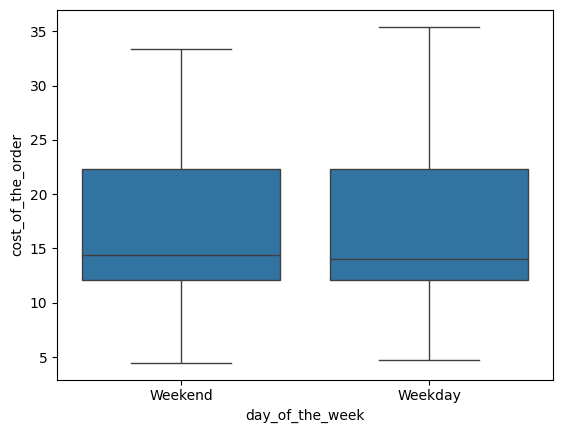

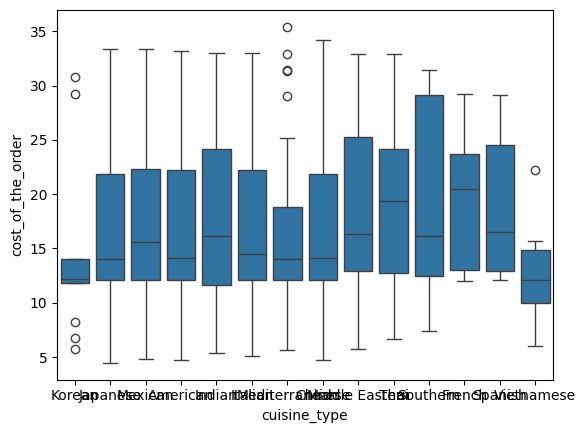

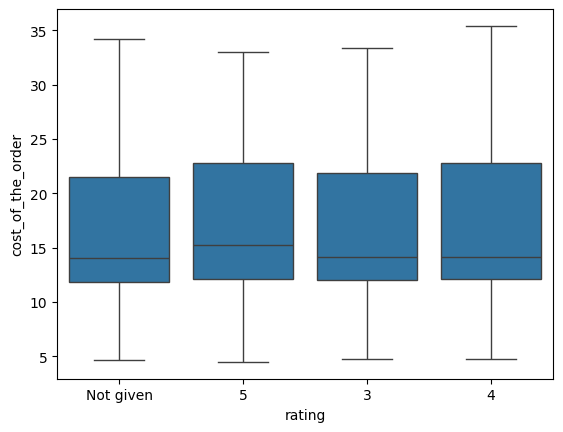

In [99]:
# prompt: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

# Explore relationships between numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.show()

# Explore relationships between numerical and categorical variables
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.show()

sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.show()

sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.show()

# Write the code here


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# prompt: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

# Create a crosstab of restaurant names and rating counts
restaurant_ratings = pd.crosstab(df['restaurant_name'], df['rating'])

# Calculate the average rating for each restaurant
average_ratings = restaurant_ratings.mean(axis=1)

# Filter restaurants with rating count > 50 and average rating > 4
eligible_restaurants = average_ratings[
    (restaurant_ratings.sum(axis=1) > 50) & (average_ratings > 4)
]

# Print the eligible restaurants
print(eligible_restaurants)


restaurant_name
Blue Ribbon Fried Chicken    24.00
Blue Ribbon Sushi            29.75
Parm                         17.00
RedFarm Broadway             14.75
RedFarm Hudson               13.75
Shake Shack                  54.75
The Meatball Shop            33.00
dtype: float64


In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# prompt: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

# Calculate the commission for each order
df['commission'] = df['cost_of_the_order'].apply(lambda x: 0.25 * x if x > 20 else 0.15 * x if x > 5 else 0)

# Calculate the total commission earned by the company
total_commission = df['commission'].sum()

# Print the net revenue generated by the company
print(f"Net revenue generated by the company: {total_commission:.2f}")


Net revenue generated by the company: 6166.30


In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# prompt: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

total_time = df['food_preparation_time'] + df['delivery_time']
percentage_above_60 = (total_time > 60).sum() / total_time.shape[0] * 100
print(f"Percentage of orders taking more than 60 minutes to deliver: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes to deliver: 10.54%


In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# prompt: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

weekday_mean_delivery_time = df[df['day_of_the_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['delivery_time'].mean()
weekend_mean_delivery_time = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]['delivery_time'].mean()

print(f"Mean delivery time on weekdays: {weekday_mean_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekends: {weekend_mean_delivery_time:.2f} minutes")


Mean delivery time on weekdays: nan minutes
Mean delivery time on weekends: nan minutes


In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Chinese cuisine emerges as the most popular choice among customers.
The average order delivery time is approximately 30 minutes.

*  To foster customer loyalty, it is recommended to provide 20% discount vouchers to the top 3 most frequent customers.
*  The company should consider offering promotional incentives to restaurants with high ratings and a substantial volume of orders.
*  Implementing a higher commission on orders exceeding a value of 20 could potentially enhance the company's revenue.
*  Notably, the mean delivery time on weekends is recorded at 32 minutes.

### Recommendations:

*  The company should prioritize the promotion of Chinese, Italian, and American restaurants.
*  It should implement loyalty programs to incentivize frequent patrons and establish partnerships with well-regarded restaurants to offer promotional deals and enhance overall customer satisfaction.
*  the company should conduct thorough analysis of extended delivery times during weekends and take necessary measures to address them.
*  Monitoring the performance of delivery partners and implementing corrective actions when needed is vital. - Promotional discounts on Chinese cuisine can further bolster its popularity, and customers should be encouraged to provide feedback through incentives such as loyalty points or discounts on future orders.
*  Analyzing customer feedback is essential for identifying areas of improvement in food quality, delivery time, and overall service.
* Optimizing the delivery process to reduce delivery times, particularly on weekends, is imperative.
*  Collaborating with restaurants boasting high rating counts and average ratings can elevate the overall customer experience.
*  Furthermore, incentivizing customers to provide feedback ratings, working on reducing delivery times, particularly on weekends, and considering a loyalty program for frequent customers are crucial measures.
*  Lastly, the company should analyze the causes of prolonged food preparation times and take steps to minimize them.

---